In [1]:
import cv2
import numpy as np

In [2]:
def get_border(image_name):
	try:
		# Read the image
		img = cv2.imread(image_name, 0)
	 
		# Thresholding the image
		(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)

		# Invert the image
		img_bin = 255-img_bin 
		#cv2.imwrite("Image_bin.jpg",img_bin)

		# Defining a kernel length
		kernel_length = np.array(img).shape[1]//80
	 
		# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
		verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

		# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
		hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

		# A kernel of (3 X 3) ones.
		kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

		# Morphological operation to detect vertical lines from an image
		img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
		verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
		#cv2.imwrite("verticle_lines.jpg",verticle_lines_img)

		# Morphological operation to detect horizontal lines from an image
		img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
		horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
		#cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

		# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
		alpha = 0.5
		beta = 1.0 - alpha

		# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
		img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
		img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
		(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
		cv2.imwrite("output.png",img_final_bin)
		return True
	except Exception as error:
		print (error)

In [3]:
if __name__ == '__main__':
	image_name = 'input.png'
	get_border(image_name)

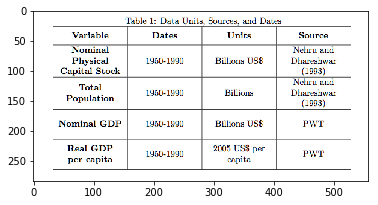

In [4]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
img = cv2.imread('input.png')
plt.imshow(img)

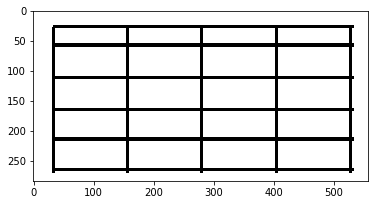

In [5]:
img = cv2.imread('output.png')
plt.imshow(img)